# Part 3
## Build a model to predict a customers order from their available information.  You will be graded largely on your intent and process when designing the model, performance is secondary. It is strongly suggested that you use SKLearn for this model as to not take too much time.  You may use any kind implementation you would like though, but it must be pickelable and have a “.predict()” method similar to SKLearn

- ## Outline your process for model selection, training and testing. Including data preparation.
- ## Design a function that prepares your data by loading the provided dataset and processes it into an appropriate machine readable format if necessary.
- ## Design a function to train your model and pickle it.
- ## Train and test your model.  Submit any training, testing and model selection visuals or metrics.
- ## Upload your work to GitHub and link the repository, make sure it is public.

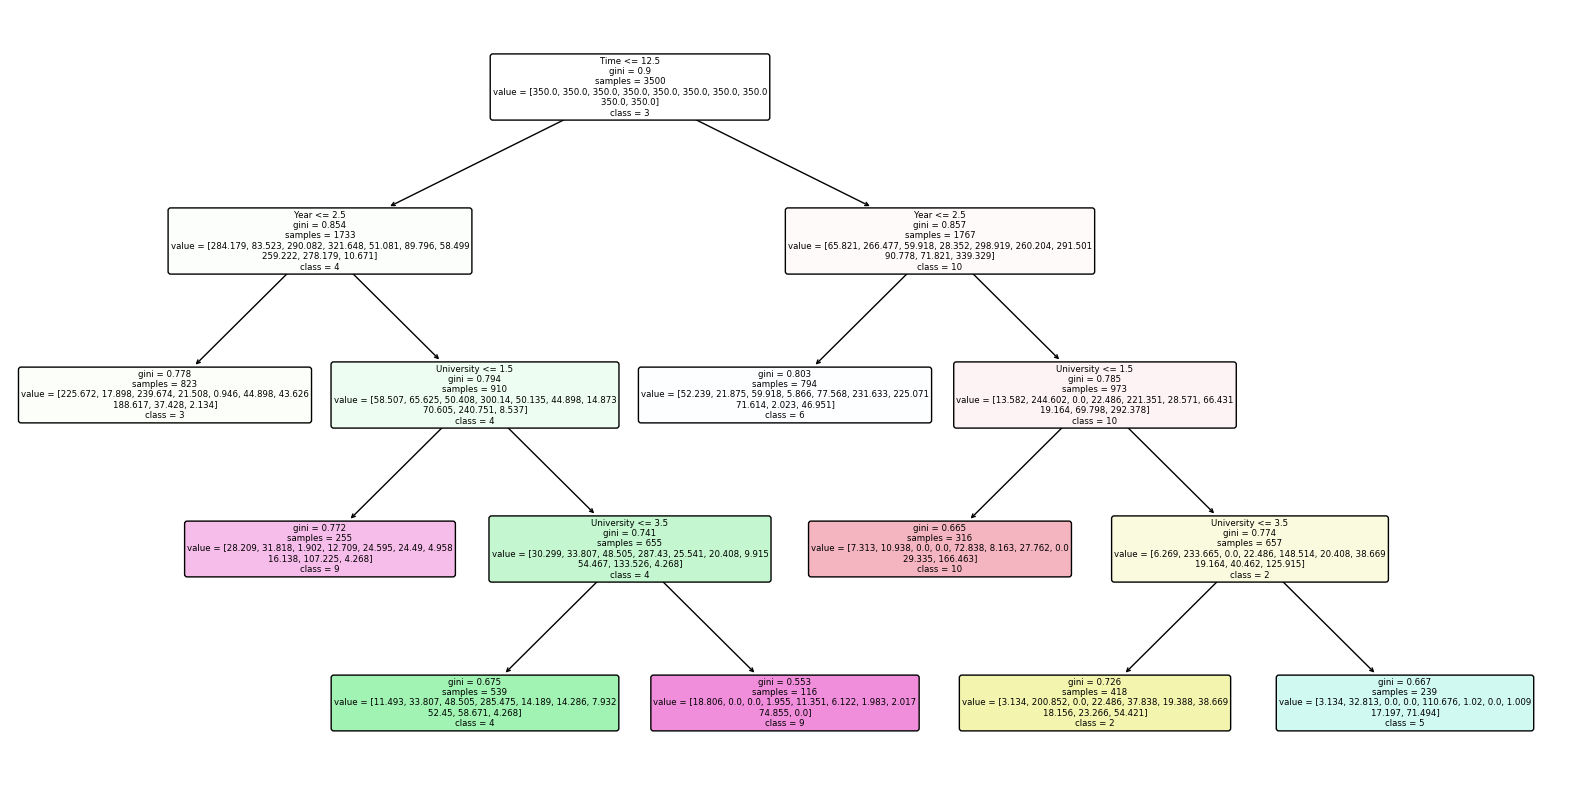

AUC Train = 0.8176
AUC Valid = 0.8113


In [105]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

data = pd.read_csv('dataset.csv').dropna()


#converting all variables into number representations
years = data.Year.unique().tolist()
years.sort()
for i in years:
    data = data.replace(i, int(years.index(i)+1))

majors = data.Major.unique().tolist()
for i in majors:
    data = data.replace(i, int(majors.index(i)+1))

universities = data.University.unique().tolist()
for i in universities:
    data = data.replace(i, int(universities.index(i)+1))

orders = data.Order.unique().tolist()
for i in orders:
    data = data.replace(i, int(orders.index(i)+1))


X = data.drop('Order', axis = 1)
y = data['Order']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


clf = DecisionTreeClassifier(class_weight = 'balanced', max_leaf_nodes = 8)

clf.fit(X_train, y_train)

#Create the figure
plt.figure(figsize=(20,10))

#Create the tree plot
plot_tree(clf,
           feature_names = ['Year', 'Major', 'University', 'Time'], #Feature names
           class_names = [str(i) for i in data.Order.unique()] , #Class names
           rounded = True,
           filled = True)

plt.show()

y_train_pred_prob = clf.predict_proba(X_train)
y_test_pred_prob = clf.predict_proba(X_test)

auc_train = metrics.roc_auc_score(y_train, y_train_pred_prob, multi_class = 'ovr')
auc_valid = metrics.roc_auc_score(y_test, y_test_pred_prob, multi_class = 'ovr')

print("AUC Train = {}\nAUC Valid = {}".format(round(auc_train,4), round(auc_valid,4)))